Morfologis Filtering
Pemrosesan citra morfologis adalah kumpulan operasi non-linier yang terkait dengan bentuk atau morfologi fitur dalam citra, seperti boundaries, skeletons, dll. Dalam teknik apa pun, Morfologis mengolah citra dengan bentuk atau template kecil yang disebut elemen penataan , yang mendefinisikan wilayah minat atau lingkungan sekitar piksel.

Basic morfologi:

Erosion
Dilation
Opening
Closing
White Tophat
Black Tophat
Skeletonize
Convex Hull

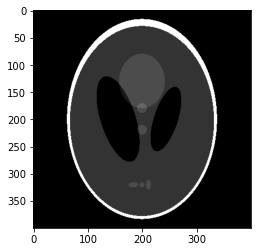

In [1]:
# Impor Library
import matplotlib.pyplot as plt
from skimage import data
from skimage.util import img_as_ubyte

# Membaca Data
orig_phantom = img_as_ubyte(data.shepp_logan_phantom())
fig, ax = plt.subplots()
ax.imshow(orig_phantom, cmap=plt.cm.gray)

In [2]:
# Membuat fungsi perbandingan plot
def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')

Erosion
Morphological erosion sets a pixel at (i, j) to the minimum over all pixels in the neighborhood centered at (i, j). The structuring element, footprint, passed to erosion is a boolean array that describes this neighborhood. Below, we use disk to create a circular structuring element, which we use for most of the following examples.

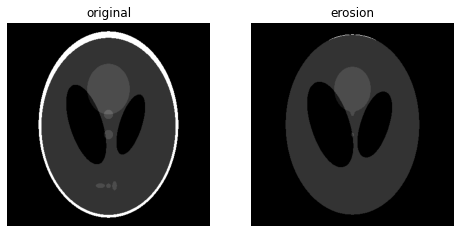

In [3]:
# Import Library
from skimage.morphology import (erosion, dilation, opening, closing,  
                                white_tophat)
from skimage.morphology import black_tophat, skeletonize, convex_hull_image  
from skimage.morphology import disk  

# Implementasi Morfogoli Erosion
footprint = disk(6)
eroded = erosion(orig_phantom, footprint)
plot_comparison(orig_phantom, eroded, 'erosion')

Notice how the white boundary of the image disappears or gets eroded as we increase the size of the disk. Also notice the increase in size of the two black ellipses in the center and the disappearance of the 3 light gray patches in the lower part of the image.

Dilation
Morphological dilation sets a pixel at (i, j) to the maximum over all pixels in the neighborhood centered at (i, j). Dilation enlarges bright regions and shrinks dark regions.

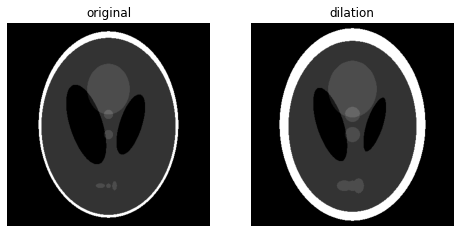

In [4]:
# Implementasi Morfologi Dilation
dilated = dilation(orig_phantom, footprint)
plot_comparison(orig_phantom, dilated, 'dilation')

Notice how the white boundary of the image thickens, or gets dilated, as we increase the size of the disk. Also notice the decrease in size of the two black ellipses in the centre, and the thickening of the light gray circle in the center and the 3 patches in the lower part of the image.

Opening
Morphological opening on an image is defined as an erosion followed by a dilation. Opening can remove small bright spots (i.e. "salt") and connect small dark cracks.

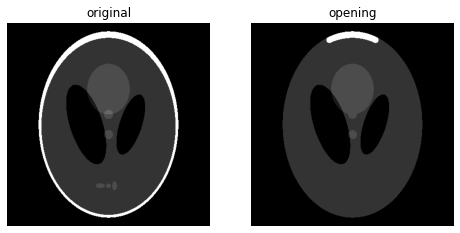

In [5]:
# Implementasi Morfologi Opening
opened = opening(orig_phantom, footprint)
plot_comparison(orig_phantom, opened, 'opening')

Since opening an image starts with an erosion operation, light regions that are smaller than the structuring element are removed. The dilation operation that follows ensures that light regions that are larger than the structuring element retain their original size. Notice how the light and dark shapes in the center their original thickness but the 3 lighter patches in the bottom get completely eroded. The size dependence is highlighted by the outer white ring: The parts of the ring thinner than the structuring element were completely erased, while the thicker region at the top retains its original thickness.

Closing
Morphological closing on an image is defined as a dilation followed by an erosion. Closing can remove small dark spots (i.e. "pepper") and connect small bright cracks.

To illustrate this more clearly, let's add a small crack to the white border:

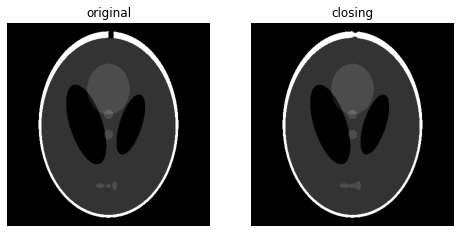

In [6]:
# Implementasi Closing
phantom = orig_phantom.copy()
phantom[10:30, 200:210] = 0

closed = closing(phantom, footprint)
plot_comparison(phantom, closed, 'closing')

Since closing an image starts with an dilation operation, dark regions that are smaller than the structuring element are removed. The dilation operation that follows ensures that dark regions that are larger than the structuring element retain their original size. Notice how the white ellipses at the bottom get connected because of dilation, but other dark region retain their original sizes. Also notice how the crack we added is mostly removed.

White tophat
The white_tophat of an image is defined as the image minus its morphological opening. This operation returns the bright spots of the image that are smaller than the structuring element.

To make things interesting, we'll add bright and dark spots to the image:

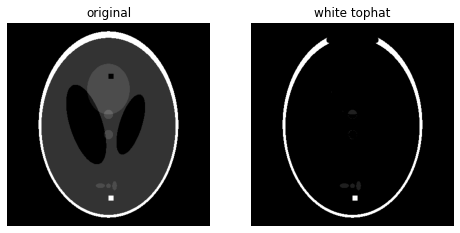

In [7]:
# Implementasi Whit Tophat
phantom = orig_phantom.copy()
phantom[340:350, 200:210] = 255
phantom[100:110, 200:210] = 0

w_tophat = white_tophat(phantom, footprint)
plot_comparison(phantom, w_tophat, 'white tophat')

As you can see, the 10-pixel wide white square is highlighted since it is smaller than the structuring element. Also, the thin, white edges around most of the ellipse are retained because they're smaller than the structuring element, but the thicker region at the top disappears.

Black tophat
The black_tophat of an image is defined as its morphological closing minus the original image. This operation returns the dark spots of the image that are smaller than the structuring element.

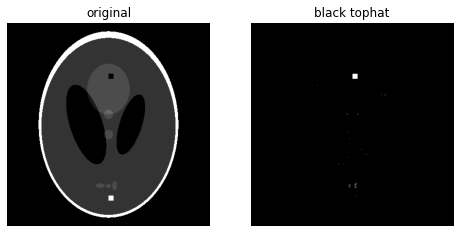

In [8]:
# Implementasi Black Tophat
b_tophat = black_tophat(phantom, footprint)
plot_comparison(phantom, b_tophat, 'black tophat')

As you can see, the 10-pixel wide black square is highlighted since it is smaller than the structuring element.

Duality

As you should have noticed, many of these operations are simply the reverse of another operation. This duality can be summarized as follows:

Erosion <-> Dilation

Opening <-> Closing

White tophat <-> Black tophat

Skeletonize
Thinning is used to reduce each connected component in a binary image to a single-pixel wide skeleton. It is important to note that this is performed on binary images only.

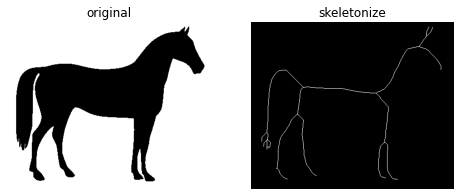

In [9]:
# Implementasi Morfologi Skeletonize
horse = data.horse()

sk = skeletonize(horse == 0)
plot_comparison(horse, sk, 'skeletonize')

As the name suggests, this technique is used to thin the image to 1-pixel wide skeleton by applying thinning successively.

Convex hull
The convex_hull_image is the set of pixels included in the smallest convex polygon that surround all white pixels in the input image. Again note that this is also performed on binary images.

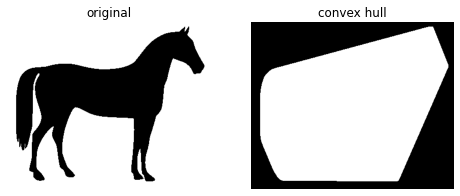

In [10]:
# Implementasi Morfologi Convex Hull
hull1 = convex_hull_image(horse == 0)
plot_comparison(horse, hull1, 'convex hull')

As the figure illustrates, convex_hull_image gives the smallest polygon which covers the white or True completely in the image.

If we add a small grain to the image, we can see how the convex hull adapts to enclose that grain:

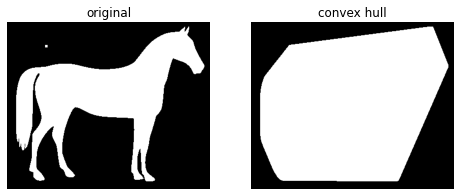

In [11]:
horse_mask = horse == 0
horse_mask[45:50, 75:80] = 1

hull2 = convex_hull_image(horse_mask)
plot_comparison(horse_mask, hull2, 'convex hull')